Pandas (and a little bit of seaborn) examples

Pandas is a library for dealing with tabular data (called DataFrames). Essentially it's a way to create and manipulate labeled data tables of mixed types that can then be used with Seaborn to quickly plot (and then manipulate the plot with matplotlib).

In [6]:
# Import everything we'll need - 'sns' is the typical import alias for seaborn for some reason -
# Apparently it's because of a TV character named Seaborn with those initials. Go figure.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob

rates = np.loadtxt('rates.txt')
rates

array([[  0.,  35.,   0., 157.],
       [ 14.,   0.,  26.,   0.],
       [  0.,  14.,   0.,  26.],
       [ 35.,   0.,  87.,   0.]])

Let's start with an artificial, tiny data set representing two simulations of a kinetic system with three states over four timesteps. For now we'll say we have our input data in the form of numpy arrays (pandas supports importing from a lot of other file types too - we'll use csv importing later for the "real" example).

We have an array of timesteps that's the same for both simulations, and two arrays representing the state probabilities that we gathered - let's say they're both stored in the array differently to show how we'd load them both into data frames:

In [7]:
times = [0., 0.1, 0.2, 0.3]

# [[p1 at each time step],
#  [p2 at each time step],
#  [p3 at each time step]]
run1 = np.array([[0.25, 0.40, 0.15, 0.40],
                 [0.50, 0.40, 0.35, 0.50],
                 [0.25, 0.20, 0.50, 0.10]])

# [[p1, p2, p3 at timestep 1],
#  [p1, p2, p3 at timestep 2]....
run2 = np.array([[0.15, 0.40, 0.45],
                 [0.20, 0.20, 0.60],
                 [0.25, 0.25, 0.50],
                 [0.10, 0.15, 0.75]])


There's lots of different ways to initialize a DataFrame, but the easiest for me in most cases is a dictionary, with keys representing the labels we're giving each column in the table, and the values associated with those keys being the actual data in list-like form. Let's add columns to keep track of which run data is coming from, the timestep of each data point, and the probability for each of the three steps at that timestep (prob1, prob2, prob3). We're going to initialize these DataFrames as wide form, since that's how our data is organized, but later we'll convert it to long form to work with it.

In [8]:
# For run1 we can just pass in the separate rows of the array directly,
# since they're already lists of probabilities for each state
df_1 = pd.DataFrame({'Run': '1',
                     'Time': times,
                     'prob1': run1[0],
                     'prob2': run1[1],
                     'prob3': run1[2]})

# For run2, since rows instead represent separate timesteps, we'll instead use the transpose (array.T)
# and then take the rows as normal
df_2 = pd.DataFrame({'Run': '2',
                     'Time': times,
                     'prob1': run2.T[0],
                     'prob2': run2.T[1],
                     'prob3': run2.T[2]})

# Here's our two dataframes for both runs:
print(df_1)
display(df_2)

  Run  Time  prob1  prob2  prob3
0   1   0.0   0.25   0.50   0.25
1   1   0.1   0.40   0.40   0.20
2   1   0.2   0.15   0.35   0.50
3   1   0.3   0.40   0.50   0.10


,Run,Time,prob1,prob2,prob3
0,2,0.0,0.15,0.40,0.45
1,2,0.1,0.20,0.20,0.60
2,2,0.2,0.25,0.25,0.50
3,2,0.3,0.10,0.15,0.75


We'd like to combine these two DF's to work with all the data we have at once - pd.concat([df1, df2, df3....]) does this
Note that the index row that Pandas adds doesn't get changed -we can reset this with .reset_index(), or just get rid of it, but we don't really need to worry about it unless we want to access rows directly by index (for example, taking df[3])

In [9]:
df = pd.concat([df_1, df_2])
display(df)

# Let's sort it by time instead of separate runs - 
# we don't need to do this for Seaborn, but it can be useful for operations that act on adjacent rows for example
df_sorted = df.sort_values(by='Time')
df_sorted

,Run,Time,prob1,prob2,prob3
0,1,0.0,0.25,0.50,0.25
1,1,0.1,0.40,0.40,0.20
2,1,0.2,0.15,0.35,0.50
3,1,0.3,0.40,0.50,0.10
0,2,0.0,0.15,0.40,0.45
1,2,0.1,0.20,0.20,0.60
2,2,0.2,0.25,0.25,0.50
3,2,0.3,0.10,0.15,0.75


,Run,Time,prob1,prob2,prob3
0,1,0.0,0.25,0.50,0.25
0,2,0.0,0.15,0.40,0.45
1,1,0.1,0.40,0.40,0.20
1,2,0.1,0.20,0.20,0.60
2,1,0.2,0.15,0.35,0.50
2,2,0.2,0.25,0.25,0.50
3,1,0.3,0.40,0.50,0.10
3,2,0.3,0.10,0.15,0.75


We can use Seaborn to very quickly plot the data contained in a DataFrame (and add multiple lines with different colors / styles to represent the different index variables in our DF). Plotting with seaborn uses matplotlib, so any Seaborn plots will update plt just like a plt.plot() call - thus we can edit the figure once it's plotted just like a pure MPL figure. There's lots of different Seaborn plot types, but we'll stick to simple lineplots right now to visualize our data.

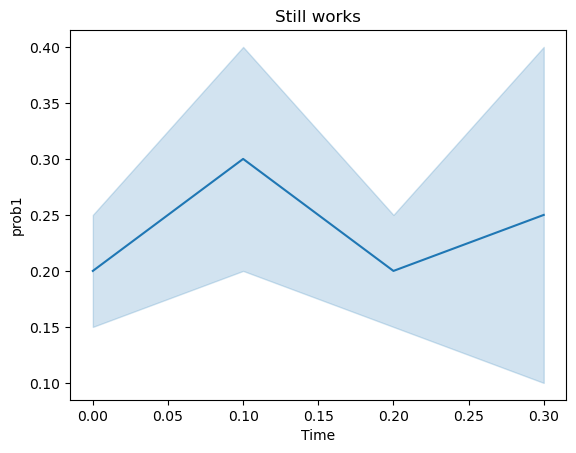

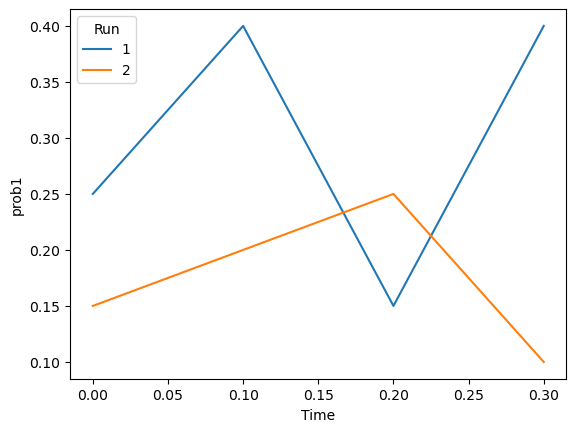

In [10]:
# Here we're not specifying hue='Run', so seaborn will plot every data point it sees
# at every timestep - here that means we have two points at each timestep from two runs,
# and it's graphed as a range with the mean (by default) highlighted as a line
sns.lineplot(data=df_sorted, x='Time', y='prob1')
plt.title('Still works')
plt.show()
plt.close()

# Now if we specify the hue kwarg, we'll get a second plot that differentiates
# data from the two runs from one another
sns.lineplot(data=df_sorted, x='Time', y='prob1', hue='Run')
plt.show()
plt.close()

Long form vs Wide form
Seaborn's docs go into this and why it's convenient in much more detail (https://seaborn.pydata.org/tutorial/data_structure.html) but esssentially seaborn is geared to work with long form data, where each row in the table represents one single data point, and columns represent the index variables of that data point (what run it is part of, what timestep, what state, etc). In our case, note that in wide form we don't have a nice way to plot the probabilities of all three states in one command (we're only plotting state 1 above). Instead, in long form, we can specify separating states by hue and work with them that way.

Pandas has df.melt() that converts wide form data to long form data - we specify:
* one or more id variables (in our case run and time) that are the identifiers for each row in our original DF (i.e., each row in the wide DF represents measurements in a certain run at a certain timestep)

* One or more value variables, which is the actual data stored in our DF - in our case we have three, the probabilities of each state. df.melt() will turn one row into three, like so:


wide form:

-------

run time  p1 p2 p3

----

r1  t1    x1 y1 z1

r2  t2    x2 y2 z2

----

to long form:

-----

run time state probability 

------

r1  t1   1     x1

r1  t1   2     y1

r1  t1   3     z1

r2  t2   1     x2 ...

* Here we specify state as the label for the new variable column (based on value_vars) and probability as the label for the value column

In [11]:
df_long = df_sorted.melt(id_vars=['Run', 'Time'], 
                         value_vars=['prob1', 'prob2', 'prob3'], 
                         var_name='State', 
                         value_name='Probability')

display(df_long)

# By default our new state labels are just the column labels of the value columns -
# let's rename them to just '1', '2', '3':
df_long = df_long.replace(['prob1', 'prob2', 'prob3'], ['1', '2', '3'])

display(df_long)


,Run,Time,State,Probability
0,1,0.0,prob1,0.25
1,2,0.0,prob1,0.15
2,1,0.1,prob1,0.40
3,2,0.1,prob1,0.20
4,1,0.2,prob1,0.15
5,2,0.2,prob1,0.25
6,1,0.3,prob1,0.40
7,2,0.3,prob1,0.10
8,1,0.0,prob2,0.50
9,2,0.0,prob2,0.40


,Run,Time,State,Probability
0,1,0.0,1,0.25
1,2,0.0,1,0.15
2,1,0.1,1,0.40
3,2,0.1,1,0.20
4,1,0.2,1,0.15
5,2,0.2,1,0.25
6,1,0.3,1,0.40
7,2,0.3,1,0.10
8,1,0.0,2,0.50
9,2,0.0,2,0.40


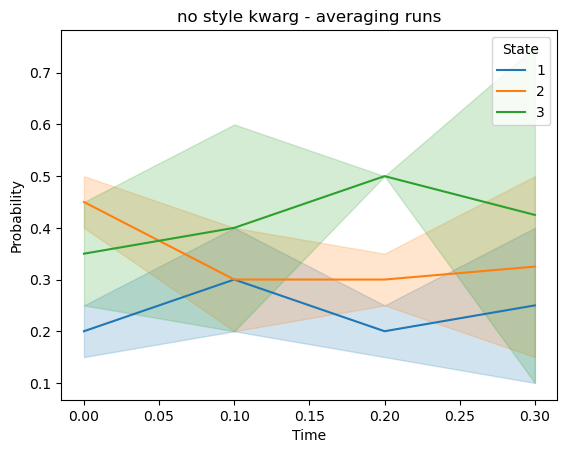

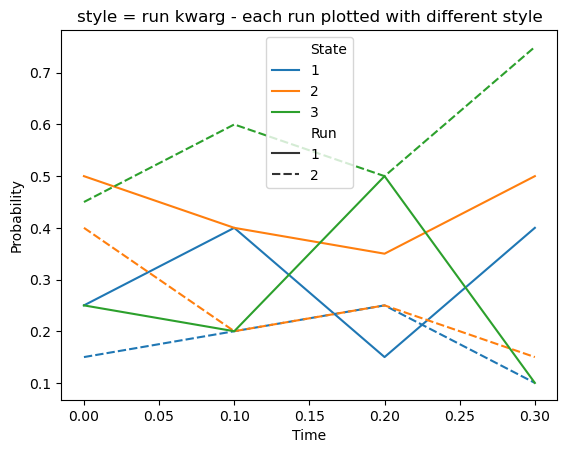

In [12]:
# Now we can plot with seaborn, and use the state variable as our hue kwarg to plot:
sns.lineplot(data=df_long, x='Time', y='Probability', hue='State')
plt.title('no style kwarg - averaging runs')
plt.show()
plt.close()

# We can even use the run variable to use different line styles as well:
sns.lineplot(data=df_long, x='Time', y='Probability', hue='State', style='Run')
plt.title('style = run kwarg - each run plotted with different style')
plt.show()
plt.close()

If we want to select a subset of a DataFrame based on a condition, df.loc[] works (NOTE the [] - this is a property, not a function!) The syntax is:

df.loc[(condition)]

with multiple conditions, use & for and and | for or, and enclose each condition in parentheses:

df.loc[((c1) & (c2)) | c3]

is choosing the rows that meet (c1 AND c2) OR c3

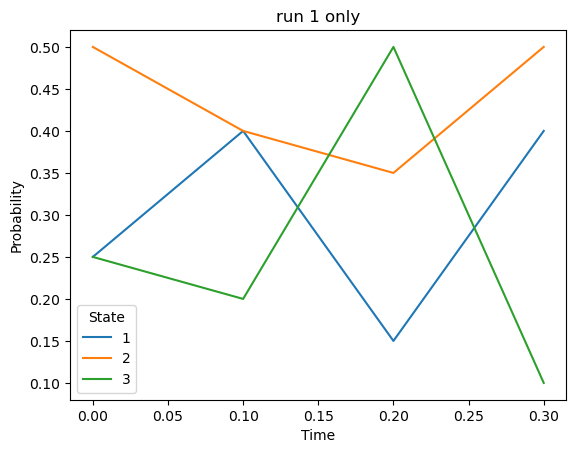

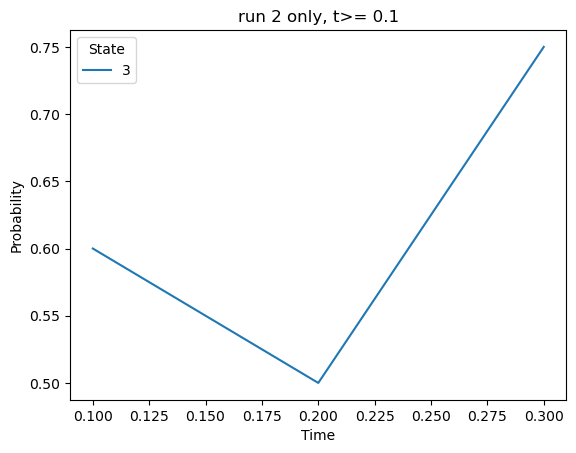

In [13]:
# Let's pick out the data for just the first run: in this case, the condition is
# df['Run'] == '1'
df_r1 = df_long.loc[df_long['Run'] == '1']
sns.lineplot(data = df_r1, x='Time', y='Probability', hue='State')
plt.title('run 1 only')
plt.show()
plt.close()

# Now let's pick out just the second run, AND only timesteps that are 0.1s or later:
df_r2_filtered = df_long.loc[(df_long['Run'] == '2') &
                             (df_long['Time'] >= 0.1) &
                             (df_long['Probability'] > 0.3)]

sns.lineplot(data = df_r2_filtered, x='Time', y='Probability', hue='State')
plt.title('run 2 only, t>= 0.1')
plt.show()
plt.close()

Now, as an example, let's do something much more complicated. Say we want to calculate the net flux of the transitions in this system at each datapoint and store this in a new DF, flux_df. Let's say that all our reactions are first order and our probabilities are deterministic, so flux_ij = rate_ij * prob_i. Let's first write a custom function that takes in a row of the probability DF, and returns a dictionary with rows corresponding to the fluxes of reactions leaving that state.

For convenience, let's say our model is cyclic, with the rates below, and that we define the positive flux as going from a lower numbered state to a higher one - 1 -> 2 -> 3 -> 1 - note that we need to add a special exception for the 3 -> 1 case.

In [14]:
def add_flux(row, rates=None, neg_direction_exceptions=[]):
    # initialize eventual output dict - start and end are 
    # the start and end states of the reaction, respectively
    output_rows = {'run': [], 'time': [], 'start': [], 'end': [], 'flux': []}
    
    # the starting state of all reactions leaving this state is this state, of course
    start = row['State']
    
    # Get the timestep and run as well
    time = row['Time']
    run = row['Run']

    # Get the row of our input rate matrix corresponding to reactions leaving this state -
    # reactions leaving state 1 are in row 0 of the rate matrix, for instance
    rates_row = rates[int(start) - 1]
    
    # Finally calculate the flux as this row of rates times the probability of that state (so this is a vector out)
    fluxes = rates_row * row['Probability']
    
    # For readability let's just loop through this 1D flux vector and handle it:
    for (i,), flux in np.ndenumerate(fluxes):
        
        # If our flux is 0 this reaction doesn't exist, just continue
        if flux > 0:
            
            # The end state is the index we're at in the flux array (+ 1 because zero indexing)
            end = str(i + 1)
            
            # Check if this reaction is defined as positive or negative - for convenience later,
            # we're going to label the start and end as they are in the positive direction,
            # and indicate which direction we're actually going by the sign of the flux
            if int(start) > int(end) and (start, end) not in neg_direction_exceptions:
                flux = -flux
                output_rows['start'].append(end)
                output_rows['end'].append(start)
            
            # 1->3 needs to be - if 3->1 is +, for example
            elif (end, start) in neg_direction_exceptions:
                flux = -flux
                output_rows['start'].append(end)
                output_rows['end'].append(start)
            
            else:
                output_rows['start'].append(start)
                output_rows['end'].append(end)
                
            # Append all our data to the list in the dict and eventually return the dict
            output_rows['run'].append(run)
            output_rows['time'].append(time)
            output_rows['flux'].append(flux)
            
    return output_rows

Now we can apply this function to each row of the DF - pd.apply(func) does this (it's slow, since it's basically just a for loop in disguise, but we'll discuss speeding it up later). This will give us a new DF where each row is the dictionary we return out of the function, let's call it flux_df

In [15]:
example_rates = np.array([[0., 5., 2.],
                          [3., 0., 7.],
                          [8., 1., 0.]])

flux_df = df_long.apply(add_flux, result_type='expand', axis=1, rates=example_rates, neg_direction_exceptions=[('3', '1')])
flux_df

,run,time,start,end,flux
0,"[1, 1]","[0.0, 0.0]","[1, 3]","[2, 1]","[1.25, -0.5]"
1,"[2, 2]","[0.0, 0.0]","[1, 3]","[2, 1]","[0.75, -0.3]"
2,"[1, 1]","[0.1, 0.1]","[1, 3]","[2, 1]","[2.0, -0.8]"
3,"[2, 2]","[0.1, 0.1]","[1, 3]","[2, 1]","[1.0, -0.4]"
4,"[1, 1]","[0.2, 0.2]","[1, 3]","[2, 1]","[0.75, -0.3]"
5,"[2, 2]","[0.2, 0.2]","[1, 3]","[2, 1]","[1.25, -0.5]"
6,"[1, 1]","[0.3, 0.3]","[1, 3]","[2, 1]","[2.0, -0.8]"
7,"[2, 2]","[0.3, 0.3]","[1, 3]","[2, 1]","[0.5, -0.2]"
8,"[1, 1]","[0.0, 0.0]","[1, 2]","[2, 3]","[-1.5, 3.5]"
9,"[2, 2]","[0.0, 0.0]","[1, 2]","[2, 3]","[-1.2000000000000002, 2.8000000000000003]"


This is close to what we want, but we want each entry in the lists in these rows to be their own rows - df.explode() does this (fun name) - specify the columns you want to explode lists into separate rows (in our case all of them), and then we'll chain on a sort function that sorts first by run, then by time, then finally by the start state:

In [16]:
flux_df = flux_df.explode(column=['run', 'time', 'start', 'end', 'flux']).sort_values(by=['run', 'time', 'start'])
display(flux_df)

,run,time,start,end,flux
0,1,0.0,1,2,1.25
8,1,0.0,1,2,-1.5
8,1,0.0,2,3,3.5
16,1,0.0,2,3,-0.25
0,1,0.0,3,1,-0.5
16,1,0.0,3,1,2.0
2,1,0.1,1,2,2.0
10,1,0.1,1,2,-1.2
10,1,0.1,2,3,2.8
18,1,0.1,2,3,-0.2


Nearly there - now we want to combine the positive and negative flux for each reaction (notice at each timestep each reaction 1->j has two entries, one positive and one negative). For this, let's group by all of our id variables (so we'll create separate groups of each set of rows that have the same run, timestep, start and end states), sum their fluxes, and put it in a new row called flux. This is a pretty ugly syntax in my opinion, but it gets the job done - note flux=('flux', 'sum') sums the group along the flux column and creates a new row called flux - if we wanted to call the row net_flux, it'd be net_flux=('flux', 'sum').

In [17]:
grouped = flux_df.groupby(by=['run', 'time', 'start', 'end']).agg(flux=('flux', 'sum'))
display(grouped)

flux
run time start end      
1   0.0  1     2   -0.25
         2     3    3.25
         3     1     1.5
    0.1  1     2     0.8
         2     3     2.6
         3     1     0.8
    0.2  1     2    -0.3
         2     3    1.95
         3     1     3.7
    0.3  1     2     0.5
         2     3     3.4
         3     1     0.0
2   0.0  1     2   -0.45
         2     3    2.35
         3     1     3.3
    0.1  1     2     0.4
         2     3     0.8
         3     1     4.4
    0.2  1     2     0.5
         2     3    1.25
         3     1     3.5
    0.3  1     2    0.05
         2     3     0.3
         3     1     5.8

Note that we have a weird hierarchical ordering with row values now - this works fine most of the time, but to get back to the more familiar and comforting layout, just call .reset_index() (assuming again that you're not using your index column for anything)

,run,time,start,end,flux
0,1,0.0,1,2,-0.25
1,1,0.0,2,3,3.25
2,1,0.0,3,1,1.5
3,1,0.1,1,2,0.8
4,1,0.1,2,3,2.6
5,1,0.1,3,1,0.8
6,1,0.2,1,2,-0.3
7,1,0.2,2,3,1.95
8,1,0.2,3,1,3.7
9,1,0.3,1,2,0.5


<Axes: xlabel='time', ylabel='flux'>

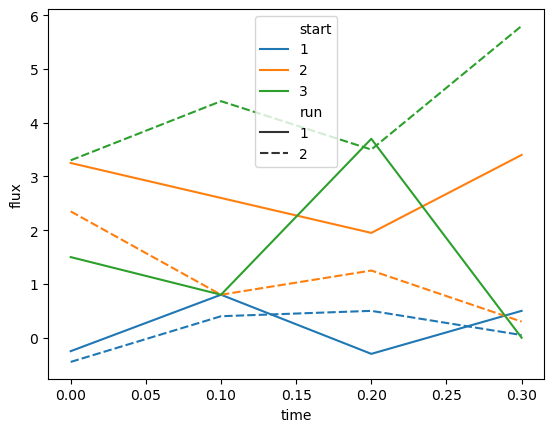

In [18]:
net_flux_df = grouped.reset_index()
display(net_flux_df)
sns.lineplot(data=net_flux_df, x='time', y='flux', hue='start', style='run')

Now let's just repeat all of those sets but for a much more involved data set - I have 5 runs of a stochastic simulation of a cyclic kinetic network with 4 states stored in this directory in .csv files, and a .txt file storing their rate matrix. We can repeat all of the exact steps we did here to calculate and plot net fluxes for this much more complicated case:

In [19]:
# Empty DF to concatenate our read CSV's to
prob_df = pd.DataFrame({'Run': [], 'Time': [], 'State': [], 'Probability': []})

# Cycle through all of the .csv files in this directory and concat to our empty DF
path = '*.csv'
for fname in glob.glob(path):
    new_df = pd.read_csv(fname, index_col=0, dtype={'Run': 'string',
                                                    'Time': np.float64,
                                                    'State': 'string',
                                                    'Probability': np.float64})
    # Name the runs after the file names (without extention)
    new_df['Run'] = fname.split('.')[0]
    prob_df = pd.concat([prob_df, new_df])
prob_df

,Run,Time,State,Probability
0,run0,0.000000,1,0.25
1,run0,0.000000,2,0.25
2,run0,0.000000,3,0.25
3,run0,0.000000,4,0.25
4,run0,0.000326,1,0.25
...,...,...,...,...
2603,run4,0.199617,4,0.11
2604,run4,0.200171,1,0.06
2605,run4,0.200171,2,0.19
2606,run4,0.200171,3,0.62


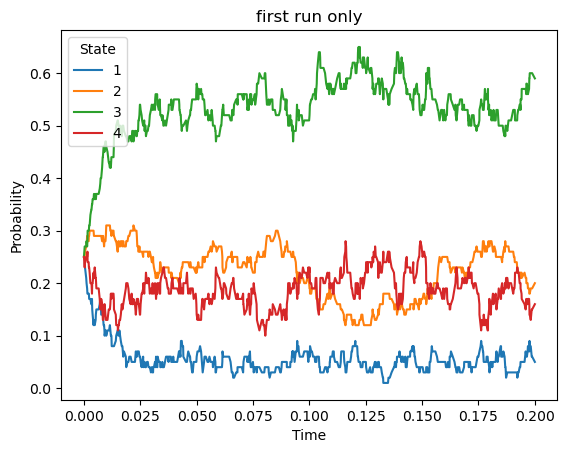

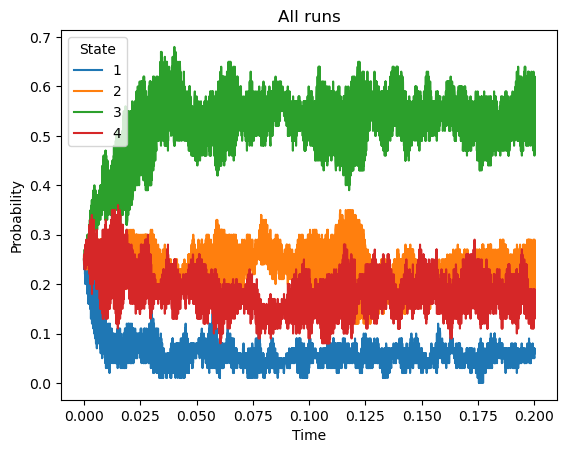

In [20]:
# Now let's plot just the first run:
sns.lineplot(data=prob_df.loc[prob_df['Run'] == 'run0'], x='Time', y='Probability', hue='State')
plt.title('first run only')
plt.show()
plt.close()

# And all runs:
sns.lineplot(data=prob_df, x='Time', y='Probability', hue='State')
plt.title('All runs')
plt.show()
plt.close()

In [21]:
# Repeating all our steps from before: this is just copy/pasted from above. 
# You can and probably should wrap a function around sets of commands you do often
# and build up a library of convenience wrapper functions that will roll all of those commands into one
flux_df = prob_df.apply(add_flux, result_type='expand', axis=1, rates=rates, neg_direction_exceptions=[('4', '1')])

flux_df = flux_df.explode(column=['run', 'time', 'start', 'end', 'flux']).sort_values(by=['run', 'time', 'start'])

grouped = flux_df.groupby(by=['run', 'time', 'start', 'end']).agg(flux=('flux', 'sum'))

net_flux_df = grouped.reset_index()

display(net_flux_df)

,run,time,start,end,flux
0,run0,0.000000,1,2,5.25
1,run0,0.000000,2,3,3.0
2,run0,0.000000,3,4,-15.25
3,run0,0.000000,4,1,-30.5
4,run0,0.000326,1,2,5.25
...,...,...,...,...,...
13083,run4,0.199617,4,1,-7.14
13084,run4,0.200171,1,2,-0.56
13085,run4,0.200171,2,3,-3.74
13086,run4,0.200171,3,4,4.81


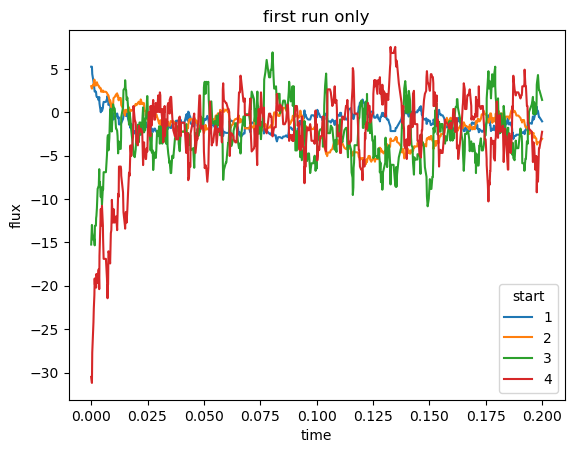

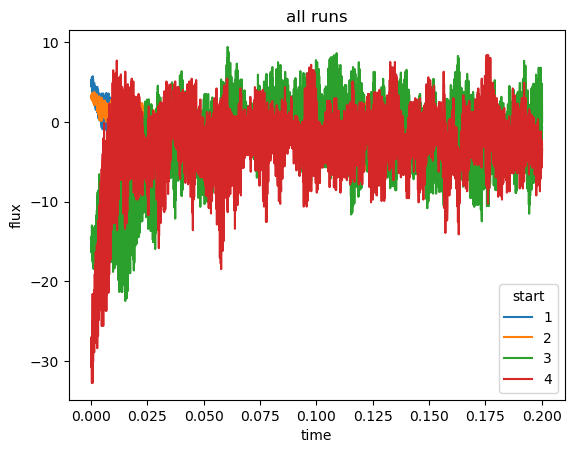

In [23]:
# Finally let's plot our new flux data!
sns.lineplot(data=net_flux_df.loc[net_flux_df['run'] == 'run0'], x='time', y='flux', hue='start')
plt.title('first run only')
plt.show()
plt.close()
sns.lineplot(data=net_flux_df, x='time', y='flux', hue='start')
plt.title('all runs')
plt.show()
plt.close()

This is far from the only way of doing things and will depend on personal preference (and how fast you need it to be). See also:

* polars: (https://pola.rs/) - DataFrames with a very similar feature set and syntax, but MUCH faster executing (and can convert back and forth between Pandas and Polars DFs easily) - if you're working with huge datasets and Pandas is too slow but you like the workflow, try doing it in Polars LazyFrames and then converting back to Pandas at the end.

* xarray: (https://docs.xarray.dev/en/stable/#) - Higher dimensional tables (essentially 3+D DataFrames) - good if working with dimensional data in terms of slices of a higher dimensional table makes more sense to you, or if your data set (e.g. (x, y, z) coordinates) lends itself to that better, and again is easy to convert to and from Pandas

* numba: (https://numba.pydata.org/) - cython for lazy people - if your code is mostly just math on numpy arrays, adding a numba declaration can automatically compile it to much faster executing code - but it's picky and can be annoying. Pandas is slowly adding support for using it with DF columns - df.apply() has a engine='numba' kwarg in the latest updates.

* Just do everything in numpy arrays and cast to a DF at the end (or just plot straight from the array) - nothing wrong with that if it works well for how you work, and it's certainly one of the fastest options (especially with numba)